In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

def plot_lp(A, b, c):
    # define the objective function and constraints
    def f(x, y, z):
        return c[0] * x + c[1] * y + c[2] * z
    
    def g(x, y, z):
        return np.all(np.dot(A, [x, y, z]) <= b)
    
    # set up the plot
    fig = plt.figure()
    ax = plt.axes(projection='3d')

    # define the x, y, and z ranges for the plot
    x = y = z = range(0, 51)

    # create the meshgrid
    X, Y, Z = plt.meshgrid(x, y, z)

    # calculate the objective function values
    F = f(X, Y, Z)

    # calculate the constraint function values
    G = g(X, Y, Z)

    # plot the feasible region
    ax.plot_surface(X, Y, Z, alpha=0.2, cmap='RdYlBu')

    # plot the objective function
    ax.plot_surface(X, Y, F, alpha=0.5, cmap='RdYlBu')

    # add the labels
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    # show the plot
    plt.show()


In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MIE 1666 Project/init_submission_results/all_merged.csv', index_col = 0)
df = df.loc[df['status']==df['status_grid']]
df = df.loc[df['status']==df['status_rl']]
df = df.loc[df['status_grid']==df['status_rl']]
original = df.copy()
df.head()
default = df[['NAME','gap','SOLUTION TIME','status']].copy()
default['method'] = 'default'
grid = df[['NAME','gap_grid','SOLUTION TIME_grid','status_grid']].copy()
grid.columns = ['NAME','gap','SOLUTION TIME','status']
grid['method'] = 'grid'
rl = df[['NAME','gap_rl','SOLUTION TIME_rl','status_rl']].copy()
rl.columns = ['NAME','gap','SOLUTION TIME','status']
rl['method'] = 'rl'
df = pd.concat([default,grid,rl])
df = df.reset_index()
df = df.loc[df['gap']<1000]

<AxesSubplot:xlabel='SOLUTION TIME', ylabel='method'>

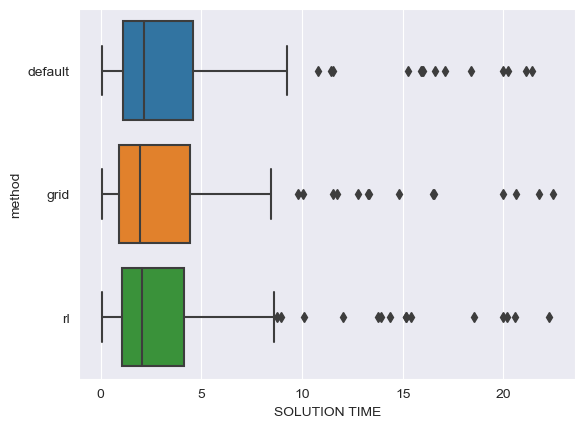

In [ ]:
sns.boxplot(data=df, x="SOLUTION TIME", y="method")

<AxesSubplot:xlabel='gap', ylabel='method'>

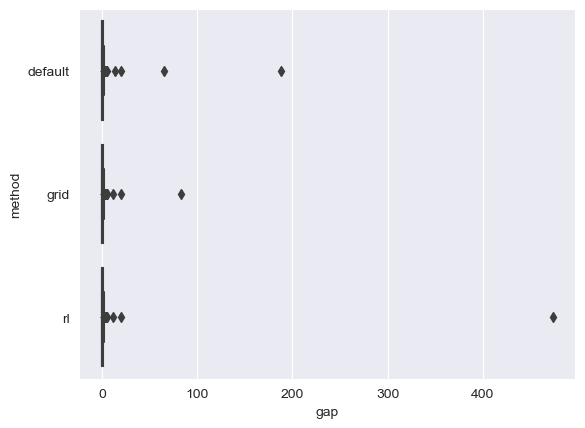

In [ ]:
sns.boxplot(data=df, x="gap", y="method")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MIE 1666 Project/init_submission_results/all_merged.csv', index_col = 0)
original = df.copy()
df = df[df['NAME'] != "neos-5107597-kakapo"]
df = df[df['gap_grid'] < 1000]
df = df[df['gap_rl'] < 1000]
df = df[df['status'] == df['status_grid']]
df = df[df['status'] == df['status_rl']]

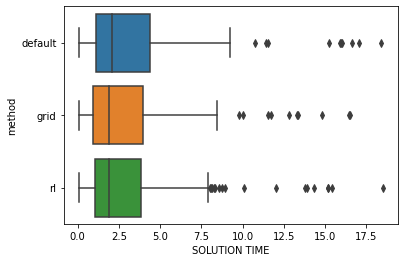

In [ ]:
default = df[['NAME','gap','SOLUTION TIME','status']].copy()
default['method'] = 'default'
grid = df[['NAME','gap_grid','SOLUTION TIME_grid','status_grid']].copy()
grid.columns = ['NAME','gap','SOLUTION TIME','status']
grid['method'] = 'grid'
rl = df[['NAME','gap_rl','SOLUTION TIME_rl','status_rl']].copy()
rl.columns = ['NAME','gap','SOLUTION TIME','status']
rl['method'] = 'rl'

runtime = pd.concat([default,grid,rl])
runtime = runtime.reset_index()
runtime = runtime[runtime['status'] != 'timelimit']


sns.boxplot(data=runtime, x="SOLUTION TIME", y="method")

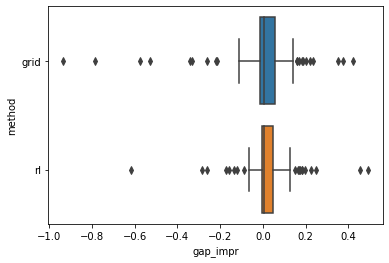

In [ ]:
from pandas.io.formats.format import GenericArrayFormatter
df['gap_impr_grid'] = -1* (df['gap_grid'] - df['gap'] )/(df['gap']+1e-8)
df['gap_impr_rl'] = -1* (df['gap_rl'] - df['gap'] )/(df['gap']+1e-8)

grid = df[['NAME','gap_grid','gap_impr_grid','status_grid']].copy()
grid.columns = ['NAME','gap','gap_impr','status']
grid['method'] = 'grid'
rl = df[['NAME','gap_rl','gap_impr_rl','status_rl']].copy()
rl.columns = ['NAME','gap','gap_impr','status']
rl['method'] = 'rl'

gap_impr = pd.concat([grid,rl])
gap_impr = gap_impr.reset_index()
gap_impr = gap_impr[gap_impr['status'] != 'optimal']
sns.boxplot(data=gap_impr, x="gap_impr", y="method")

In [ ]:
df['gap_impr_grid'] = -1* (df['gap_grid'] - df['gap'] )/(df['gap']+1e-8)
df['gap_impr_rl'] = -1* (df['gap_rl'] - df['gap'] )/(df['gap']+1e-8)
df.head()

,NAME,gap,SOLUTION TIME,status,gap_grid,SOLUTION TIME_grid,status_grid,gap_rl,SOLUTION TIME_rl,status_rl,gap_impr_grid,gap_impr_rl
0,berlin,0.000000,0.587572,optimal,0.000000,0.790234,optimal,0.000000,0.746871,optimal,-0.000000,-0.000000
1,bg512142,0.327021,2.928575,nodelimit,0.325025,2.619662,nodelimit,0.329165,2.680081,nodelimit,0.006104,-0.006557
2,bienst1,0.851624,2.173534,nodelimit,0.813869,2.062659,nodelimit,0.875467,2.135686,nodelimit,0.044333,-0.027997
3,bienst2,1.255742,2.590775,nodelimit,1.216365,2.359396,nodelimit,1.291415,2.597132,nodelimit,0.031357,-0.028408
4,binkar10_1,0.003887,2.843618,nodelimit,0.004311,2.533756,nodelimit,0.003855,3.028379,nodelimit,-0.108943,0.008342


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MIE 1666 Project/init_submission_results/all_merged.csv', index_col = 0)
df = df.loc[df['status']==df['status_grid']]
df = df.loc[df['status']==df['status_rl']]
df = df.loc[df['status_grid']==df['status_rl']]
original = df.copy()
df.head()
default = df[['NAME','gap','SOLUTION TIME','status']].copy()
default['method'] = 'default'
grid = df[['NAME','gap_grid','SOLUTION TIME_grid','status_grid']].copy()
grid.columns = ['NAME','gap','SOLUTION TIME','status']
grid['method'] = 'grid'
rl = df[['NAME','gap_rl','SOLUTION TIME_rl','status_rl']].copy()
rl.columns = ['NAME','gap','SOLUTION TIME','status']
rl['method'] = 'rl'
df = pd.concat([default,grid,rl])
df = df.reset_index()
df = df.loc[df['gap']<1000]

In [ ]:
grid = df_[['NAME','gap_impr_grid']].copy()
grid.columns = ['NAME','gap_impr']
grid['method'] = 'grid'
rl = df_[['NAME','gap_impr_rl']].copy()
rl.columns = ['NAME','gap_impr']
rl['method'] = 'rl'
df = pd.concat([grid,rl])
df = df.reset_index()

In [ ]:
df.head(50)

,index,NAME,gap_impr,method
0,0,berlin,-0.000000e+00,grid
1,1,bg512142,6.104264e-03,grid
2,2,bienst1,4.433288e-02,grid
3,3,bienst2,3.135731e-02,grid
4,4,binkar10_1,-1.089426e-01,grid
5,5,bppc8-02,1.314394e-01,grid
6,6,bppc8-09,-7.869121e-01,grid
7,7,brasil,-0.000000e+00,grid
8,8,cost266-UUE,-1.031587e-02,grid
9,9,danoint,3.075021e-04,grid


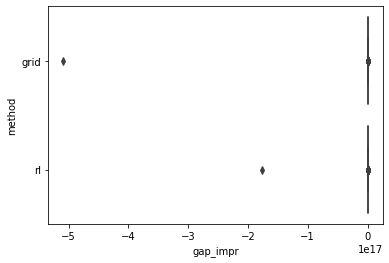

In [ ]:
sns.boxplot(data=df, x="gap_impr", y="method")

In [ ]:
df[df['gap_impr']<-1].head(30)

,index,NAME,gap_impr,method
69,70,neos-5107597-kakapo,-5.089735e+17,grid
187,70,neos-5107597-kakapo,-6.228740e+00,rl
199,82,ns2071214,-1.768571e+17,rl
218,101,sp150x300d,-1.404914e+06,rl


In [ ]:
import pandas as pd

In [ ]:
import numpy as np
df_hetero3 = pd.read_csv("/content/drive/MyDrive/MIE 1666 Project/init_submission_results/hetero_3.csv",index_col = 0)
df_hetero['SOLUTION TIME'] = np.minimum(df_hetero['SOLUTION TIME'],df_hetero3['SOLUTION TIME'])

In [ ]:
df_all = pd.read_csv('/content/drive/MyDrive/MIE 1666 Project/init_submission_results/all_merged.csv', index_col = 0)
#df_hetero = pd.read_csv("/content/drive/MyDrive/MIE 1666 Project/init_submission_results/hetero_2.csv",index_col = 0)
df_merge4 = pd.merge(df_all, df_hetero, on='NAME', how='inner', suffixes=('', '_hetero'))

df_hit_time_limit = df_merge4[df_merge4['status'] == 'nodelimit']

df_optimal = df_merge4[df_merge4['status'] != 'nodelimit']


In [ ]:
import matplotlib.pyplot as plt

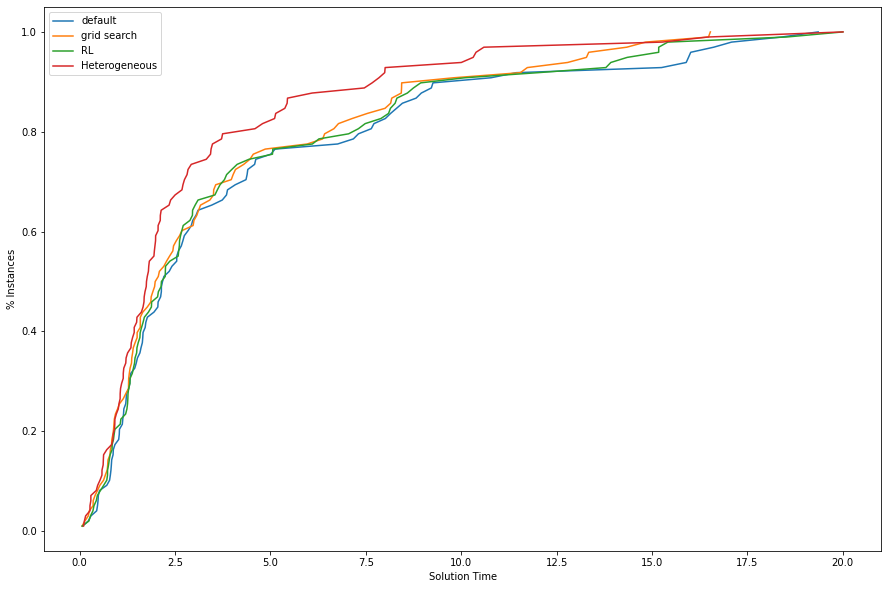

In [ ]:
stats_df = df_hit_time_limit.groupby('SOLUTION TIME')['SOLUTION TIME'].agg('count').pipe(pd.DataFrame).rename(columns = {'SOLUTION TIME': 'frequency_default'})
stats_df2 = df_hit_time_limit.groupby('SOLUTION TIME_grid')['SOLUTION TIME_grid'].agg('count').pipe(pd.DataFrame).rename(columns = {'SOLUTION TIME_grid': 'frequency_grid'})
stats_df3 = df_hit_time_limit.groupby('SOLUTION TIME_rl')['SOLUTION TIME_rl'].agg('count').pipe(pd.DataFrame).rename(columns = {'SOLUTION TIME_rl': 'frequency_rl'})
stats_df4 = df_hit_time_limit.groupby('SOLUTION TIME_hetero')['SOLUTION TIME_hetero'].agg('count').pipe(pd.DataFrame).rename(columns = {'SOLUTION TIME_hetero': 'frequency_hetero'})


stats_df['pdf_default'] = stats_df['frequency_default'] / sum(stats_df['frequency_default'])
stats_df2['pdf_grid'] = stats_df2['frequency_grid'] / sum(stats_df2['frequency_grid'])
stats_df3['pdf_rl'] = stats_df3['frequency_rl'] / sum(stats_df3['frequency_rl'])
stats_df4['pdf_hetero'] = stats_df4['frequency_hetero'] / sum(stats_df4['frequency_hetero'])

stats_df['cdf_default'] = stats_df['pdf_default'].cumsum()
stats_df = stats_df.reset_index()
stats_df2['cdf_grid'] = stats_df2['pdf_grid'].cumsum()
stats_df2 = stats_df2.reset_index()
stats_df3['cdf_rl'] = stats_df3['pdf_rl'].cumsum()
stats_df3 = stats_df3.reset_index()
stats_df4['cdf_hetero'] = stats_df4['pdf_hetero'].cumsum()
stats_df4 = stats_df4.reset_index()

plt.figure(figsize= (15,10))
plt.plot(stats_df['SOLUTION TIME'].to_list(), stats_df['cdf_default'].to_list(), label = "default")
plt.plot(stats_df2['SOLUTION TIME_grid'].to_list(), stats_df2['cdf_grid'].to_list(), label = "grid search")
plt.plot(stats_df3['SOLUTION TIME_rl'].to_list(), stats_df3['cdf_rl'].to_list(), label = "RL")
plt.plot(stats_df4['SOLUTION TIME_hetero'].to_list(), stats_df4['cdf_hetero'].to_list(), label = "Heterogeneous")
plt.xlabel('Solution Time')
plt.ylabel('% Instances')
plt.legend()
plt.show()